In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data["Heart Disease"] = data["Heart Disease"].map({"Absence":0, "Presence": 1})
data = data.rename(columns={'EKG results': 'ECG results'})
data = data[data['ECG results'] != 1]
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,ECG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


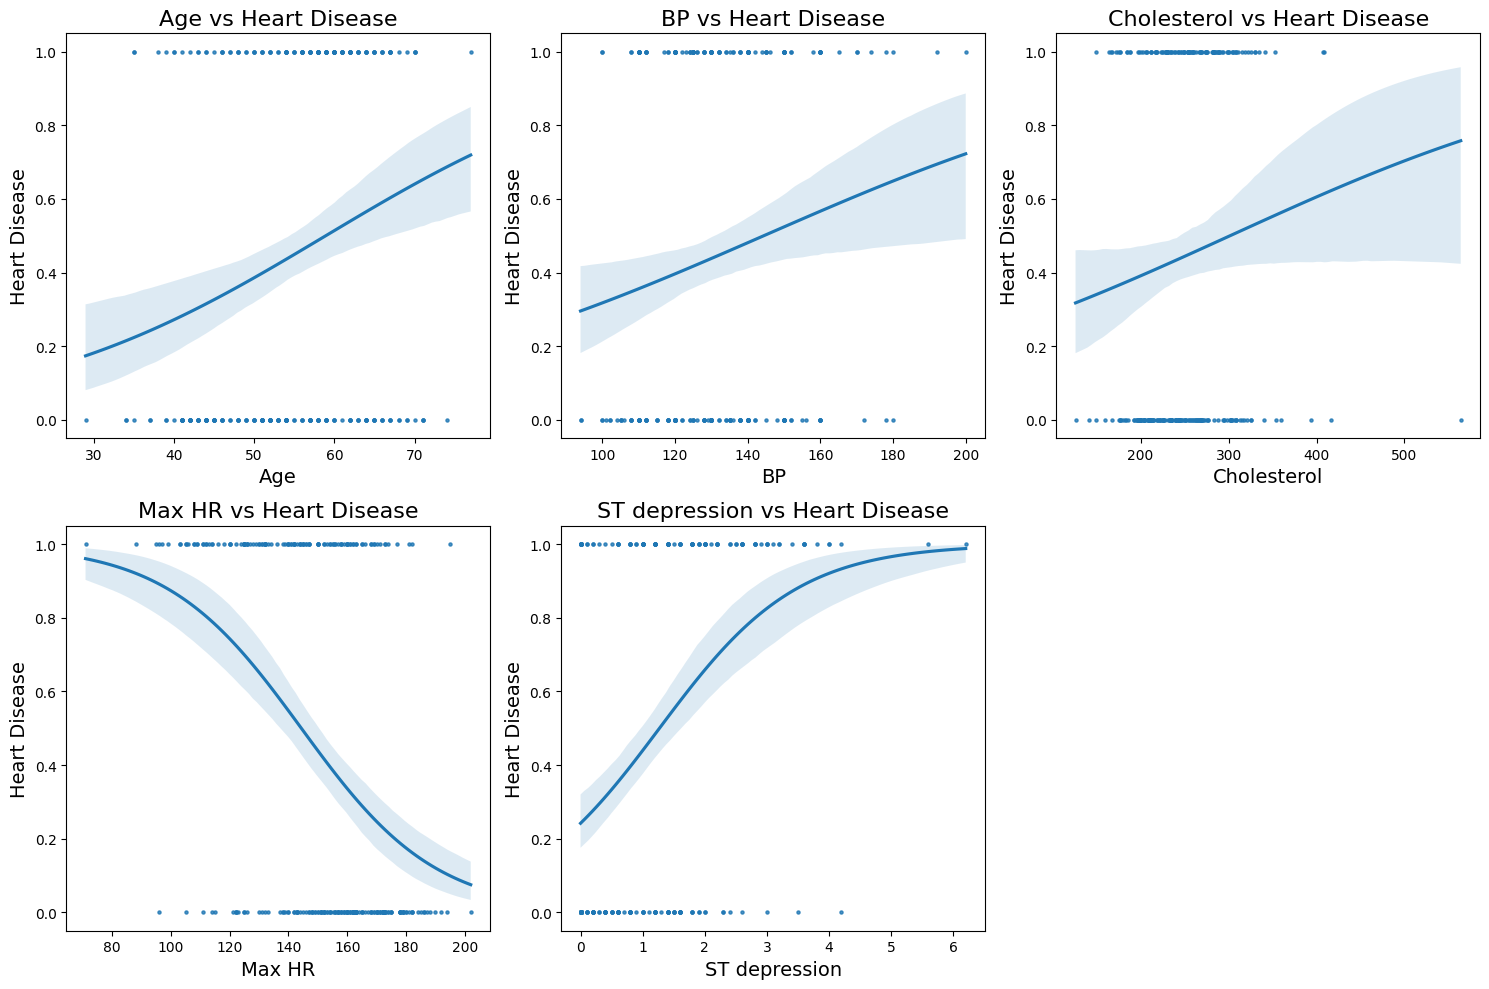

In [8]:
numerical_vars = data.select_dtypes(include='number').columns.drop("Heart Disease").to_list()
numerical_vars = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="Heart Disease", data=data, ax=ax, scatter_kws={'s':5}, logistic = True)  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs Heart Disease', fontsize = 16)
    ax.set_xlabel(variable, fontsize = 14)
    ax.set_ylabel('Heart Disease', fontsize = 14)

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

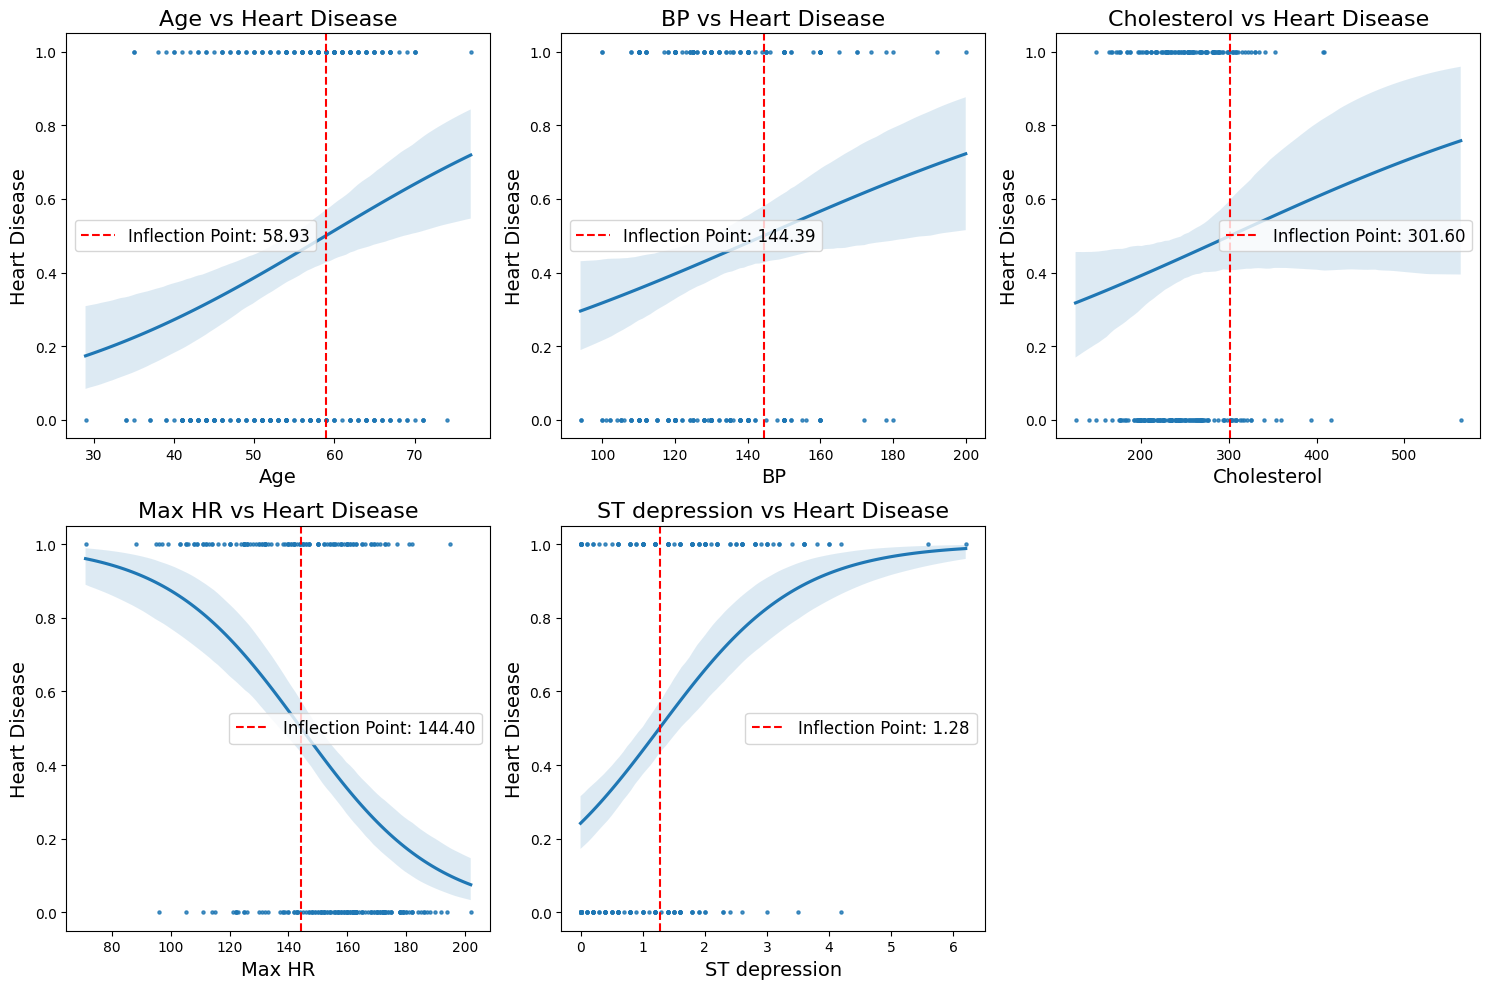

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

numerical_vars = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]

    # Fit logistic regression model for each variable
    X = data[[variable]].values.reshape(-1, 1)
    y = data["Heart Disease"].values
    log_reg = LogisticRegression().fit(X, y)

    # Calculate the inflection point (where probability = 0.5)
    inflection_point = -log_reg.intercept_[0] / log_reg.coef_[0][0]

    # Plot regression with logistic curve
    sns.regplot(x=variable, y="Heart Disease", data=data, ax=ax, scatter_kws={'s': 5}, logistic=True)
    ax.axvline(x=inflection_point, color='red', linestyle='--', label=f'Inflection Point: {inflection_point:.2f}')
    
    # Set title and labels
    ax.set_title(f'{variable} vs Heart Disease', fontsize=16)
    ax.set_xlabel(variable, fontsize=14)
    ax.set_ylabel('Heart Disease', fontsize=14)
    legend = ax.legend(fontsize=12)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


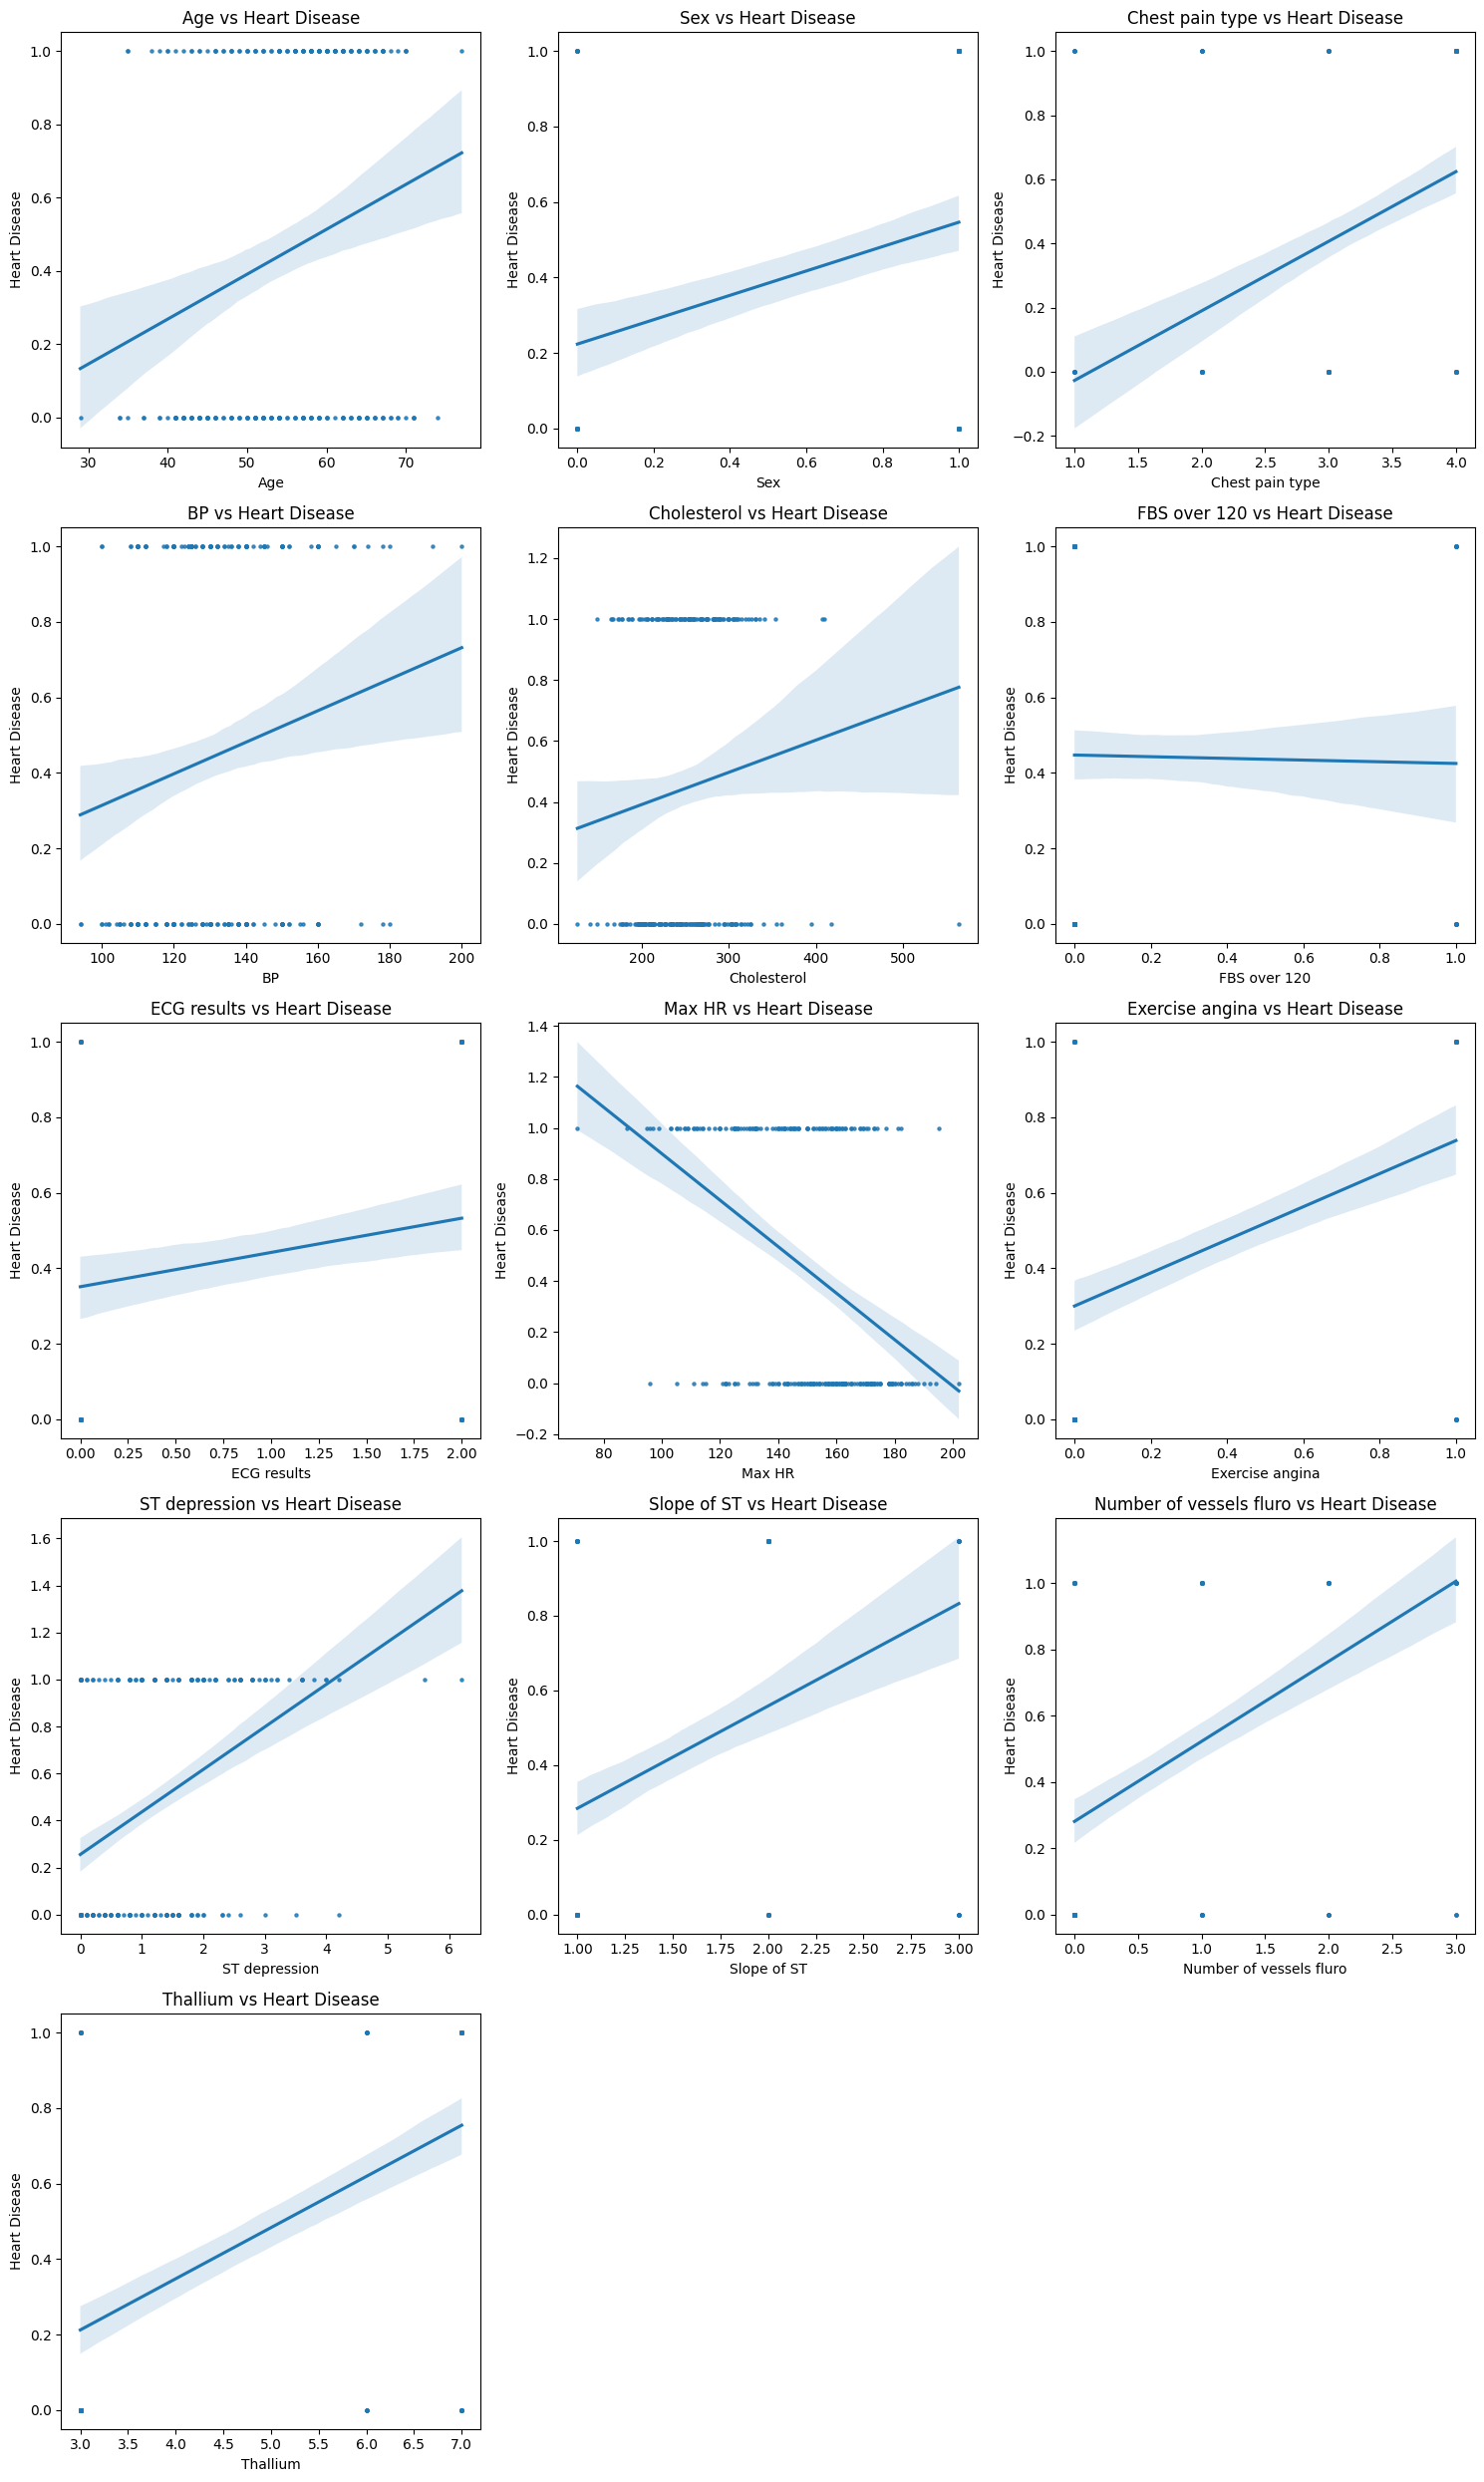

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.drop("Heart Disease").to_list()
ncols = 3
nrows = -(-len(numerical_vars) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.regplot(x=variable, y="Heart Disease", data=data, ax=ax, scatter_kws={'s':5})  # scatter_kws is to control point size
    ax.set_title(f'{variable} vs Heart Disease')
    ax.set_xlabel(variable)
    ax.set_ylabel('Heart Disease')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()